![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Logo_Swile.svg/2560px-Logo_Swile.svg.png)

## *"The most useless card of the moment"*

## Time : 15 min

[Swile](https://www.swile.co/en-FR) is a french company whose goal is to offer employee benefits via a payment card. The company was founded in 2017 and raised $70M Series C in 2020.

In [1]:
from IPython.display import Video
Video(
    "https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/Swile_presentation.mp4",
    width=700,
    height=500
    )

After raising this much money, COVID hit western world really hard and almost all countries were on lock-down putting Swile in a really hard position since no restaurants were opened.

Instead of waiting for COVID to pass, they decided to launch a large marketing campaign called: *La carte la plus inutile du moment* (The most useless card of the moment). The goal was to get to sign new clients despite the tough situation.

In almost every big city in France, we could see this kind of advertisement:

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/swile_car.webp)

Now that the marketing campaign is done, Swile would like to know whether this marketing campaign add an impact on sales!

Swile provided you with some data about sales before the marketing campaign. Our goal will be to check whether this marketing campaign was a genius idea or a huge failure so that the company could replicate it abroad.

This dataset describes the number of calls on the same day in France and abroad. The only difference between these two samples is the impact of Marketing campaign.

Test whether the average number of calls in France is actually higher than the ones abroad.

## Step 1 - Import libraries

<Note type = "tip">Remember to install any necessary libraries before importing them.</Note>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Display settings
pd.set_option('display.float_format', lambda x: f"{x:,.3f}")

<Note type = "tip">
The `stats` module from SciPy contains statistical tests, probability distributions, confidence intervals, etc. That’s what we use for t-tests, Shapiro tests, etc.

`pd.set_option('display.float_format', lambda x: f"{x:,.3f}")` changes how Pandas prints numbers in DataFrames. By default, Pandas may show numbers like `5.785714285714286`. With this setting, numbers are shown as 3 decimals (e.g., 5.786). The `,` means it would also use thousands separators if needed (e.g., 12,345.678).
</Note>

## Step 2 - Import Dataset

We use `swile_sales_calls.csv` with two integer columns:

- `calls_in_France`
- `calls_abroad`

Each row represents one observation.

Now you need to import your dataset. Download `swile_sales_calls.csv` and load it in your notebook using `pandas`

In [3]:
df = pd.read_csv("swile_sales_calls.csv")
df.head()

,calls_abroad,calls_in_France
0,4,6
1,4,2
2,4,9
3,9,9
4,2,9


In [4]:
# Quick structure & summary
print('Shape:', df.shape)
print("------------")
print('Dtypes:')
print(df.dtypes)

summary = df.describe()
summary

Shape: (70, 2)
------------
Dtypes:
calls_abroad       int64
calls_in_France    int64
dtype: object


,calls_abroad,calls_in_France
count,70.000,70.000
mean,5.500,5.786
std,2.717,2.049
min,1.000,2.000
25%,3.000,5.000
50%,5.000,6.000
75%,8.000,7.000
max,9.000,9.000


## Step 3 - EDA

For our EDA, we will simply calculate the `mean` for both our columns and then try to visualize it using `.plot()` function in `pandas`

<Axes: title={'center': 'Mean of calls in France and abroad'}>

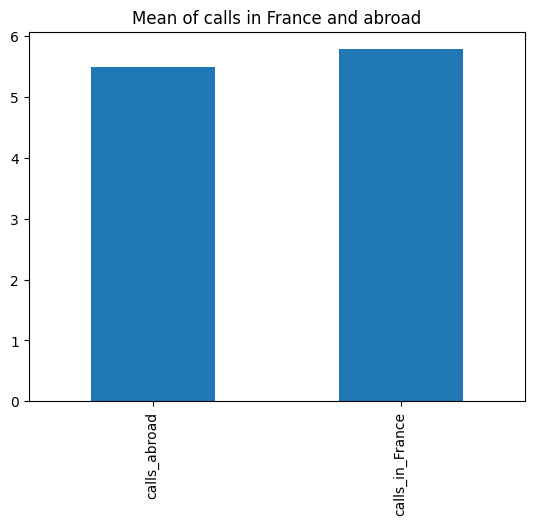

In [5]:
df.mean().plot(kind='bar',
               title='Mean of calls in France and abroad')

Below are simple histograms (no styling) to eyeball distribution shapes. This helps check whether a t‑test's normality assumption is at least roughly reasonable (with **n=70**, the t‑test is also fairly robust by the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)).

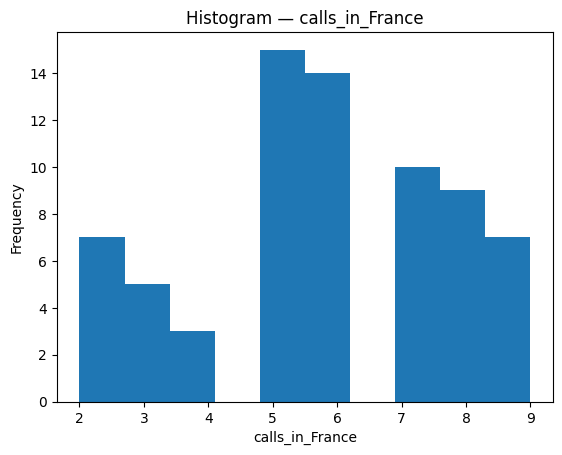

In [6]:
# Histogram: calls_in_France
plt.figure()
plt.hist(df['calls_in_France'], bins=10)
plt.title('Histogram — calls_in_France')
plt.xlabel('calls_in_France')
plt.ylabel('Frequency')
plt.show()

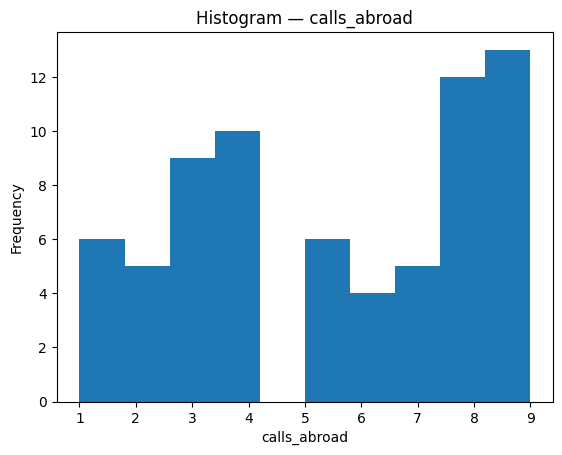

In [7]:
# Histogram: calls_abroad
plt.figure()
plt.hist(df['calls_abroad'], bins=10)
plt.title('Histogram — calls_abroad')
plt.xlabel('calls_abroad')
plt.ylabel('Frequency')
plt.show()


## Step 4 - Business Question to Answer & Statistical Hypotheses

Before setting up statistical hypotheses, we need to be clear about the **business problem** we are trying to solve.

In this dataset, each observation records:

* The number of **calls made in France**
* The number of **calls made abroad**

Management is interested in this question:

> Did the marketing campaign lead to more calls from French clients than from international clients?

Once we have a clear business question, we can formulate it as a statistical hypothesis.

**Hypotheses:**
  
For each observation, compute:

$$
\text{diff} = \text{calls\_in\_France} - \text{calls\_abroad}
$$

Hypotheses are:

$$
H_0:\ \mu_{\text{diff}} \le 0
\qquad\text{vs}\qquad
H_1:\ \mu_{\text{diff}} > 0
$$

In this case, we will use a Paired, one-tailed t-test (France vs Abroad)

## Step 5 - t-test (France − Abroad > 0)

### 1. Compute the difference

We want to know if **calls in France are higher than calls abroad**.
For each day (or observation), we have two numbers:

* `calls_in_France`
* `calls_abroad`

If we only compare averages directly, we lose the “paired” structure (same day). But since both values come from the same day, the right approach is to compute the **difference per observation**:

$$
\text{diff}_i = \text{calls\_in\_France}_i - \text{calls\_abroad}_i
$$

This transforms our two-sample question into a **one-sample test** on these differences.


In [8]:
# Compute the differences row by row
diff = df["calls_in_France"] - df["calls_abroad"]


### 2. t-test with SciPy

We now test whether the **mean of `diff`** is significantly greater than **0**. Now that we have our diff values, we want to test if their mean is significantly greater than 0.
Here’s the function you’ll use : [stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)




In [9]:
# Perform the one-sample t-test# Performing the One-Sample t-Test
# This function tests whether the sample mean is significantly different from a hypothesized population mean

# FUNCTION EXPLANATION: stats.ttest_1samp()
# This function performs a one-sample t-test and returns two values: the t-statistic and p-value
#
# SYNTAX: stats.ttest_1samp(sample_data, popmean=hypothesized_mean, alternative="test_type")

t_obs, pvalue = stats.ttest_1samp(diff, popmean=0, alternative="greater")
print(f"t_obs: {t_obs:.4f}, p-value: {pvalue:.4f}")


t_obs: 0.7259, p-value: 0.2352


* `diff` → the sample of differences (one value per user).
* `popmean=0` → the null hypothesis mean (no difference).
* `alternative="greater"` → our hypothesis is one-sided: we only care if French calls are **greater** than abroad calls.

The output `res` gives:

* **statistic (t-value)**: how many standard errors away the observed mean is from 0.
* **pvalue**: the probability of seeing a result this extreme under H₀.


<Note type = "tip">
What’s happening:

* `alternative="greater"` directly encodes our hypothesis: $H_1: \mu_{\text{diff}} > 0$
* No need to manually divide or adjust the p-value. SciPy does it for you.
* The result is cleaner and avoids mistakes in the one-tailed conversion step.

</Note>

### 3. The decision rule with $\alpha = 10\%$

Setting $\alpha = 0.10$ means we allow a 10% risk of making a wrong conclusion by saying France > Abroad when in fact there is no difference.

The rule is:

* If **p-value < 0.10** → reject $H_0$. We have evidence that the campaign increased calls in France compared to abroad.
* If **p-value ≥ 0.10** → do not reject $H_0$. The data does not provide enough evidence that France generated more calls than abroad.


In [10]:
# Set the significance level (alpha)
# Alpha represents the probability of making a Type I error (rejecting a true null hypothesis)
# Common values: 0.01 (1%), 0.05 (5%), 0.10 (10%)
# The smaller the alpha, the stronger evidence we need to reject H0
alpha = 0.10

# Display the p-value
# The p-value is the probability of observing our test statistic (or more extreme)
# assuming the null hypothesis is true

# FUNCTION HINT: .format() method inserts variables into strings
# Syntax: "text with {} placeholder".format(variable_to_insert)
# Alternative modern syntax: f"text with {variable_name}" (f-string)
print("p-value is: {}".format(pvalue))


# Make the statistical decision using p-value approach
# DECISION RULE for p-value method:
# - If p-value < alpha: Reject H0 (evidence against null hypothesis is strong enough)
# - If p-value >= alpha: Fail to reject H0 (insufficient evidence against null hypothesis)

if pvalue < alpha:
    print("Reject H0: There is sufficient evidence against the null hypothesis.")
else:
    print("Fail to reject H0: There is insufficient evidence against the null hypothesis.")


p-value is: 0.23518013477140437
Fail to reject H0: There is insufficient evidence against the null hypothesis.


## Step 6 (Optional) - Visualize probability

We want to show:

1. The **t-distribution under $H_0$** (no effect).
2. The **critical region** (upper 10% tail, since $\alpha = 0.10$).
3. The **observed t-statistic** from our test.

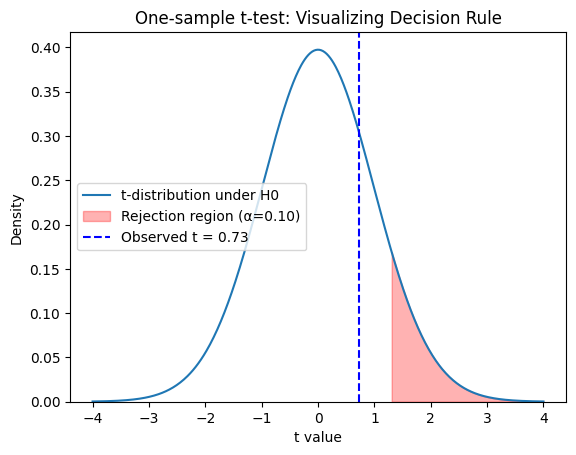

In [11]:
#  Step 1: Degrees of freedom = sample size - 1 (fundamental concept in t-tests)
df = len(diff) - 1  # degrees of freedom from sample size

# Step 2: Find the critical t-value
# This is the threshold value that separates the rejection region from the non-rejection region
# For a right-tailed test with α=0.10, we find the t-value where 90% of the distribution is to the left

# FUNCTION HINT: stats.t.ppf() finds the "percent point function" (inverse CDF)
# Syntax: stats.t.ppf(probability, degrees_of_freedom)
# For right-tailed test: use (1 - alpha) as the probability
# Example: stats.t.ppf(0.90, 10) gives the t-value where 90% of area is to the left
t_crit = stats.t.ppf(1 - alpha, df)

# Step 3: Set up the visualization
# Create a range of x-values to plot the smooth t-distribution curve

# FUNCTION HINT: np.linspace() creates evenly spaced numbers
# Syntax: np.linspace(start, stop, number_of_points)
# This creates x-values from -4 to 4 with 500 points for a smooth curve
x = np.linspace(-4, 4, 500)  # 500 points between -4 and 4 for smooth curve

# Step 4: Calculate the probability density function (PDF) values for the t-distribution
# This gives us the height of the curve at each x-value

# FUNCTION HINT: stats.t.pdf() calculates probability density function values
# Syntax: stats.t.pdf(x_values, degrees_of_freedom)
# This returns the height of the t-distribution curve at each x-value
y = stats.t.pdf(x, df)

# Step 5: Create the main plot
# Plot the theoretical t-distribution under the null hypothesis

# FUNCTION HINT: plt.plot() creates a line plot
# Syntax: plt.plot(x_values, y_values, label="description")
plt.plot(x, y, label="t-distribution under H0")

# FUNCTION HINT: plt.ylim() sets the y-axis limits
# bottom=0 ensures y-axis starts at 0 for better visualization
plt.ylim(bottom=0)

# Step 6: Highlight the rejection region
# Shade the area where we would reject H0 (right tail beyond critical value)
# If our observed t-statistic falls in this red region, we reject H0

# FUNCTION HINT: plt.fill_between() fills area between curves
# Syntax: plt.fill_between(x_values, y_values, where=condition, color="color", alpha=transparency)
# where=(x >= t_crit) means "only fill where x is greater than or equal to critical value"
# alpha=0.3 makes the shading semi-transparent (0=invisible, 1=opaque)
plt.fill_between(x, y, where=(x >= t_crit), color="red", alpha=0.3,
                 label="Rejection region (α=0.10)")

# Step 7: Mark the observed test statistic
# Show where our calculated t-statistic falls on the distribution
# This vertical line helps us visually determine if we reject or fail to reject H0

# FUNCTION HINT: plt.axvline() draws a vertical line
# Syntax: plt.axvline(x_position, color="color", linestyle="style", label="description")
# linestyle="--" creates a dashed line
plt.axvline(t_obs, color="blue", linestyle="--",
            label=f"Observed t = {t_obs:.2f}")

# Step 8: Add descriptive labels and display
# FUNCTION HINTS for plot formatting:
# plt.title() - adds a title to the plot
# plt.xlabel() - labels the x-axis
# plt.ylabel() - labels the y-axis
# plt.legend() - displays the legend with all labels
# plt.show() - displays the completed plot
plt.title("One-sample t-test: Visualizing Decision Rule")
plt.xlabel("t value")
plt.ylabel("Density")
plt.legend()
plt.show()


Since the blue line **does not fall inside the red rejection region**, we **fail to reject $H_0$**.
That means: we don’t have enough evidence that the campaign had a significant effect on call volume in France compared to abroad.